# **Fitness Tracker Data Prediction**

## **Project Objective**
The goal of this project is to build a machine learning model that predicts the number of calories burned based on user activity data from a fitness tracker. By leveraging various activity metrics such as step count, distance covered, and active minutes, we aim to create an accurate and efficient predictive system.

## **Optimization Metric**
To evaluate model performance, we will optimize for **Co-efficient of Determination (R2)** since it provides 
insight into the proportion of variance or changes in the target that is explained by the features.

## **Why PyCaret?**
PyCaret is used in this project due to its:
- **Ease of use**: It automates model selection, hyperparameter tuning, and feature engineering with minimal code.
- **Efficiency**: It enables rapid prototyping and comparison of multiple models.
- **Built-in MLflow integration**: This allows seamless experiment tracking and model registration.
- **Automated preprocessing**: PyCaret handles missing values, feature scaling, and transformations, streamlining the workflow.


# Import Relevant Packages

In [1]:
# read the data 
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for modeling
from pycaret.regression import setup

# Load dataset

In [2]:
# define path
path = r"C:\Users\TabansiJ\Documents\DexterCyberLab\data\Activity.csv"
# read the data
df = pd.read_csv(path)
df.head()


,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


# Exploratory Data Analysis

In [3]:
print(df.shape)

(940, 15)


- Data has 940 rows and 15 columns

In [4]:
df.isnull().sum()

UserID                        0
Date                          0
Total_Distance                0
Tracker_Distance              0
Logged_Activities_Distance    0
Very_Active_Distance          0
Moderately_Active_Distance    0
Light_Active_Distance         0
Sedentary_Active_Distance     0
Very_Active_Minutes           0
Fairly_Active_Minutes         0
Lightly_Active_Minutes        0
Sedentary_Minutes             0
Steps                         0
Calories_Burned               0
dtype: int64

- There are no missing values in the data

In [5]:
df.duplicated().sum()

0

- There are no duplicates in the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UserID                      940 non-null    int64  
 1   Date                        940 non-null    object 
 2   Total_Distance              940 non-null    float64
 3   Tracker_Distance            940 non-null    float64
 4   Logged_Activities_Distance  940 non-null    float64
 5   Very_Active_Distance        940 non-null    float64
 6   Moderately_Active_Distance  940 non-null    float64
 7   Light_Active_Distance       940 non-null    float64
 8   Sedentary_Active_Distance   940 non-null    float64
 9   Very_Active_Minutes         940 non-null    int64  
 10  Fairly_Active_Minutes       940 non-null    int64  
 11  Lightly_Active_Minutes      940 non-null    int64  
 12  Sedentary_Minutes           940 non-null    int64  
 13  Steps                       940 non

In [7]:
# cast the UserID column to be string
df['UserID'] = df['UserID'].astype(str)

# convert Date column to date format
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
UserID,940,33,5553957443,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,940,NaN,NaN,NaN,2016-04-26 06:53:37.021276416,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-26 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN
Total_Distance,940.0,NaN,NaN,NaN,5.489702,0.0,2.62,5.245,7.7125,28.030001,3.924606
Tracker_Distance,940.0,NaN,NaN,NaN,5.475351,0.0,2.62,5.245,7.71,28.030001,3.907276
Logged_Activities_Distance,940.0,NaN,NaN,NaN,0.108171,0.0,0.0,0.0,0.0,4.942142,0.619897
Very_Active_Distance,940.0,NaN,NaN,NaN,1.502681,0.0,0.0,0.21,2.0525,21.92,2.658941
Moderately_Active_Distance,940.0,NaN,NaN,NaN,0.567543,0.0,0.0,0.24,0.8,6.48,0.88358
Light_Active_Distance,940.0,NaN,NaN,NaN,3.340819,0.0,1.945,3.365,4.7825,10.71,2.040655
Sedentary_Active_Distance,940.0,NaN,NaN,NaN,0.001606,0.0,0.0,0.0,0.0,0.11,0.007346
Very_Active_Minutes,940.0,NaN,NaN,NaN,21.164894,0.0,0.0,4.0,32.0,210.0,32.844803


- The data consists of 33 unique UserID from 12-April-2016 to 12-May-2016

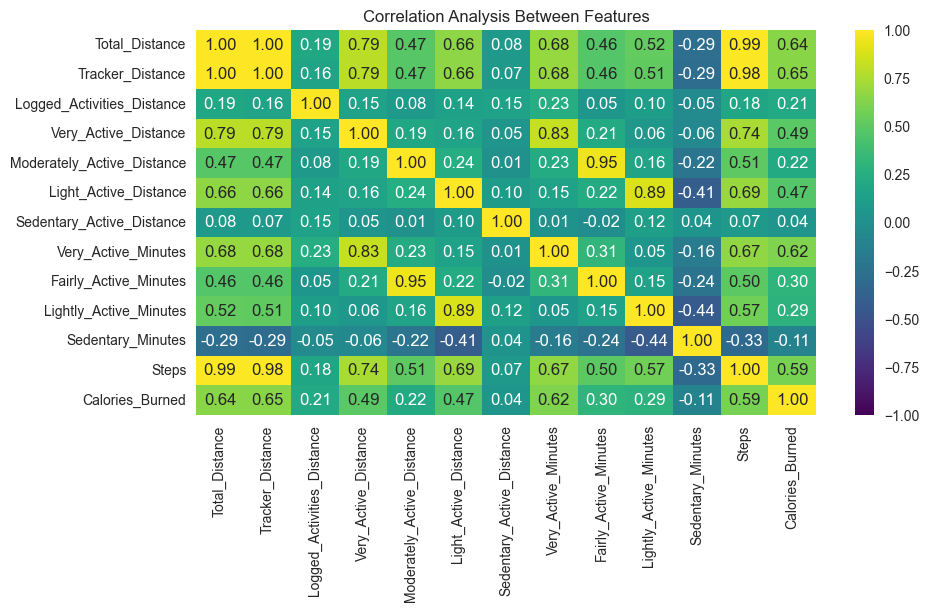

In [9]:
plt.figure(figsize=(10, 5))
plt.title("Correlation Analysis Between Features")
sns.heatmap(data=df.select_dtypes(include='number').corr(), vmin=-1, vmax=1, annot=True, cmap='viridis', fmt='.2f');
plt.show()

- Total_Distance and Tracker_Distance are perfectly correlated positively. Both features are strongly correlated with steps. Therefore, I will proceed to drop the Total_Distance and Tracker_Distance parameter. This is done to avoid multicollinearity problem resulting from features highly correlated with each other.

# Data Preparation
- This process involves removing unwanted columns, ensuring that the data is normalized for modeling.

In [10]:
df.head()

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,2016-04-20,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,2016-04-13,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,2016-04-25,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,2016-04-26,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,2016-05-09,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


In [11]:
# drop User_ID column
df.drop(['UserID', 'Date'], axis=1, inplace=True)

In [12]:
df.isnull().sum()

Total_Distance                0
Tracker_Distance              0
Logged_Activities_Distance    0
Very_Active_Distance          0
Moderately_Active_Distance    0
Light_Active_Distance         0
Sedentary_Active_Distance     0
Very_Active_Minutes           0
Fairly_Active_Minutes         0
Lightly_Active_Minutes        0
Sedentary_Minutes             0
Steps                         0
Calories_Burned               0
dtype: int64

In [13]:
df.columns

Index(['Total_Distance', 'Tracker_Distance', 'Logged_Activities_Distance',
       'Very_Active_Distance', 'Moderately_Active_Distance',
       'Light_Active_Distance', 'Sedentary_Active_Distance',
       'Very_Active_Minutes', 'Fairly_Active_Minutes',
       'Lightly_Active_Minutes', 'Sedentary_Minutes', 'Steps',
       'Calories_Burned'],
      dtype='object')

In [14]:
set_up = setup(
    data=df,
    target='Calories_Burned',
    train_size=0.7,
    numeric_features=df.select_dtypes('number').columns.tolist()[:-1],
    remove_multicollinearity=True,
    multicollinearity_threshold=0.85,
    remove_outliers=True,
    normalize=True,
    experiment_name='dexterCyberLabAssignment',
    log_experiment=True,
    log_plots=True,
    n_jobs=-1
)

,Description,Value
0,Session id,4046
1,Target,Calories_Burned
2,Target type,Regression
3,Original data shape,"(940, 13)"
4,Transformed data shape,"(907, 9)"
5,Transformed train set shape,"(625, 9)"
6,Transformed test set shape,"(282, 9)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


2025/02/26 20:56:36 INFO mlflow.tracking.fluent: Experiment with name 'dexterCyberLabAssignment' does not exist. Creating a new experiment.


In [15]:
from pycaret.regression import compare_models

In [16]:
# top 3 models
top_models = compare_models(n_select=3, round=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,353.775,200716.538,446.503,0.615,0.430,0.177,0.084
rf,Random Forest Regressor,363.586,210724.027,457.585,0.596,0.436,0.181,0.118
gbr,Gradient Boosting Regressor,370.852,211638.019,458.131,0.595,0.430,0.180,0.063
lightgbm,Light Gradient Boosting Machine,376.054,223134.235,470.526,0.571,0.459,0.225,0.166
knn,K Neighbors Regressor,388.333,237499.727,485.523,0.544,0.456,0.213,0.055
lr,Linear Regression,415.147,242071.908,489.992,0.536,0.473,0.263,1.019
lasso,Lasso Regression,415.147,242202.853,490.111,0.536,0.473,0.263,0.510
llar,Lasso Least Angle Regression,415.145,242194.946,490.103,0.536,0.473,0.263,0.038
ridge,Ridge Regression,415.234,242387.151,490.289,0.535,0.473,0.263,0.042
br,Bayesian Ridge,416.204,244288.339,492.040,0.532,0.473,0.264,0.038


In [17]:
top_models

[ExtraTreesRegressor(n_jobs=-1, random_state=4046),
 RandomForestRegressor(n_jobs=-1, random_state=4046),
 GradientBoostingRegressor(random_state=4046)]

In [18]:
# tune the top models
from pycaret.regression import tune_model

tuned_models = [tune_model(model, fold=5, n_iter=20, round=3) for model in top_models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,405.618,257965.318,507.903,0.567,0.806,0.604
1,364.717,203211.361,450.790,0.625,0.690,0.200
2,372.577,205721.756,453.566,0.642,0.678,0.171
3,351.003,175275.629,418.659,0.617,0.187,0.159
4,372.544,194100.382,440.568,0.593,0.203,0.170
Mean,373.292,207254.889,454.297,0.609,0.513,0.261
Std,17.980,27517.130,29.479,0.026,0.263,0.172


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,423.740,275422.893,524.807,0.537,0.807,0.605
1,366.667,212155.866,460.604,0.609,0.694,0.206
2,387.690,232725.405,482.416,0.595,0.682,0.180
3,363.701,182952.936,427.730,0.600,0.191,0.166
4,384.928,209716.309,457.948,0.560,0.209,0.174
Mean,385.345,222594.682,470.701,0.580,0.516,0.266
Std,21.434,30788.767,32.174,0.027,0.262,0.170


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,427.521,279444.747,528.625,0.530,0.791,0.506
1,378.443,232877.262,482.574,0.571,0.680,0.179
2,358.752,205020.785,452.792,0.643,0.677,0.163
3,341.899,189334.145,435.125,0.586,0.194,0.159
4,373.153,204585.887,452.312,0.571,0.208,0.169
Mean,375.954,222252.565,470.286,0.580,0.510,0.235
Std,28.736,31863.766,32.924,0.036,0.256,0.135


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
tuned_models

[ExtraTreesRegressor(max_depth=10, min_impurity_decrease=0.1, min_samples_leaf=3,
                     n_estimators=130, n_jobs=-1, random_state=4046),
 RandomForestRegressor(n_jobs=-1, random_state=4046),
 GradientBoostingRegressor(random_state=4046)]

In [20]:
# select best model
from pycaret.regression import automl
best_model = automl(optimize='r2')
best_model

ExtraTreesRegressor(n_jobs=-1, random_state=4046)

In [21]:
# finalize the model
from pycaret.regression import finalize_model

final_model = finalize_model(best_model)

In [22]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Total_Distance',
                                             'Tracker_Distance',
                                             'Logged_Activities_Distance',
                                             'Very_Active_Distance',
                                             'Moderately_Active_Distance',
                                             'Light_Active_Distance',
                                             'Sedentary_Active_Distance',
                                             'Very_Active_Minutes',
                                             'Fairly_Active_Minutes',
                                             'Lightly_Active_Minutes',
                                             'Sedentary_Minut...
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.85))),
                ('remove_outliers',
                 TransformerWrapper(transformer=RemoveOutliers(random_state=4046))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=4046))])

In [23]:
# Register the model on MLFlow http://127.0.0.1:5000/
!mlflow ui

^C


In [25]:
# save the best model
from pycaret.regression import save_model
save_model(best_model, 'best_model')

In [26]:
df.columns

Index(['Total_Distance', 'Tracker_Distance', 'Logged_Activities_Distance',
       'Very_Active_Distance', 'Moderately_Active_Distance',
       'Light_Active_Distance', 'Sedentary_Active_Distance',
       'Very_Active_Minutes', 'Fairly_Active_Minutes',
       'Lightly_Active_Minutes', 'Sedentary_Minutes', 'Steps',
       'Calories_Burned'],
      dtype='object')

# Generate Random data points

In [30]:
# generate random data sample
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows to generate
num_rows = 20  

# Generate UserID as unique identifiers
user_ids = [f"User_{i+1}" for i in range(num_rows)]

# Generate random dates within a fixed range
date_range = pd.date_range(start="2024-01-01", periods=num_rows, freq="D")
dates = np.random.choice(date_range, num_rows, replace=False)

# Generate random data within a reasonable range
data = {
    "UserID": user_ids,
    "Date": dates,
    "Total_Distance": np.round(np.random.uniform(0, 10, num_rows), 2),
    "Tracker_Distance": np.round(np.random.uniform(0, 10, num_rows), 2),
    "Logged_Activities_Distance": np.round(np.random.uniform(0, 2, num_rows), 2),
    "Very_Active_Distance": np.round(np.random.uniform(0, 5, num_rows), 2),
    "Moderately_Active_Distance": np.round(np.random.uniform(0, 2, num_rows), 2),
    "Light_Active_Distance": np.round(np.random.uniform(0, 7, num_rows), 2),
    "Sedentary_Active_Distance": np.round(np.random.uniform(0, 0.1, num_rows), 2),
    "Very_Active_Minutes": np.random.randint(0, 60, num_rows),
    "Fairly_Active_Minutes": np.random.randint(0, 30, num_rows),
    "Lightly_Active_Minutes": np.random.randint(0, 500, num_rows),
    "Sedentary_Minutes": np.random.randint(500, 1500, num_rows),
    "Steps": np.random.randint(100, 15000, num_rows)
}

# Create DataFrame
sample = pd.DataFrame(data)

# Sort by Date for better readability
sample = sample.sort_values(by="Date").reset_index(drop=True)

# Save to CSV
sample.to_csv("data/random_fitness_data.csv", index=False)